<center><h2><u><i>PRINCIPLES OF ARTIFICIAL INTELLIGENCE</i></u></h2>
<p><i>PROJECT:ORCHID CLASSIFICATION</i></p>
<p style="font-size:small;">By: Amir Raif Bin Mizlan(52213223142)<br>Amir Keizrul Bin Mudzir (52213223121)<br>Ahmad Afif Abdul Hadi bin A Rahim (52213223199)</p>


<center>



Our Project will be separated by sections:
- Section: Data Preparation
- Section: Data Modelling
- Section: Data Visualization

<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">1. Creating Neural Network Model</center>

<p>Import necessary library</p>

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import time
import json


<h2>Read dataset</h2>

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
import shutil
orchid_class = {
    "Apostasioideae",
    "Vanilloideae",
    "Cypripedioideae",
    "Orchidoideae",
    "Epidendroideae",
}
train_path =  os.path.join(os.getcwd(), "dataset", "train")
valid_path =  os.path.join(os.getcwd(), "dataset", "valid")
test_path =  os.path.join(os.getcwd(), "dataset", "test")

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=orchid_class, batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=orchid_class, batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224, 224), classes=orchid_class, batch_size=10, shuffle=False)

Found 7061 images belonging to 5 classes.
Found 1540 images belonging to 5 classes.
Found 1538 images belonging to 5 classes.


Check for invalid images

In [6]:
from PIL import Image
import os

def check_invalid_images(directory):
    invalid_images = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            try:
                img = Image.open(os.path.join(subdir, file))
                img.verify()  # Verifies if the image is corrupted
            except (IOError, SyntaxError) as e:
                invalid_images.append(os.path.join(subdir, file))
    return invalid_images

# Check for invalid images in the 'dataset' directory
invalid_images = check_invalid_images("dataset")
if invalid_images:
    print("Found invalid images:")
    for img in invalid_images:
        print(img)
else:
    print("All images are valid.")


All images are valid.


<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">2. Model Training</center>
We will start with load the pre esisting model

In [7]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
for layer in resnet_model.layers:
    layer.trainable = False

for layer in densenet_model.layers:
    layer.trainable = False

for layer in mobilenet_model.layers:
    layer.trainable = False

<h3>Build Model</h3>

In [9]:
def build_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Add pooling layer
        Dense(1024, activation='relu'),  # Add dense layer
        Dense(len(orchid_class), activation='softmax')  # Number of classes
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',])
    return model
    
resnet_final_model = build_model(resnet_model)
densenet_final_model = build_model(densenet_model)
mobilenet_final_model = build_model(mobilenet_model)


<h3>Rensnet model</h3>

In [10]:
resnet_final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
import time
import json

# Track the time
start_time = time.time()

# Train the model
resnet_history = resnet_final_model.fit(
    train_batches,
    epochs=50,
    validation_data=valid_batches
)


end_time = time.time()
training_time_resnet = end_time - start_time
print(f"Training Time for ResNet50: {training_time_resnet:.2f} seconds")

# Save  trained model
resnet_final_model.save('resnet50_model.h5')
print("ResNet50 model saved as 'resnet50_model.h5'")

# include training time
resnet_history_dict = resnet_history.history
resnet_history_dict["training_time"] = training_time_resnet

# Save the history to a JSON file
with open("resnet_history.json", "w") as json_file:
    json.dump(resnet_history_dict, json_file)

print("ResNet50 training history and time saved to 'resnet_history.json'")


Epoch 1/50
707/707 [==============================] - 269s 378ms/step - loss: 0.8320 - accuracy: 0.7107 - val_loss: 0.5230 - val_accuracy: 0.8143
Epoch 2/50
707/707 [==============================] - 259s 366ms/step - loss: 0.3575 - accuracy: 0.8727 - val_loss: 0.3512 - val_accuracy: 0.8909
Epoch 3/50
707/707 [==============================] - 257s 364ms/step - loss: 0.2378 - accuracy: 0.9220 - val_loss: 0.5777 - val_accuracy: 0.8422
Epoch 4/50
707/707 [==============================] - 258s 364ms/step - loss: 0.2079 - accuracy: 0.9305 - val_loss: 0.3248 - val_accuracy: 0.9078
Epoch 5/50
707/707 [==============================] - 257s 363ms/step - loss: 0.1547 - accuracy: 0.9483 - val_loss: 0.3462 - val_accuracy: 0.8903
Epoch 6/50
707/707 [==============================] - 257s 363ms/step - loss: 0.1347 - accuracy: 0.9528 - val_loss: 0.3083 - val_accuracy: 0.9234
Epoch 7/50
707/707 [==============================] - 255s 361ms/step - loss: 0.1439 - accuracy: 0.9503 - val_loss: 0.2856 -

<h2>ResNet50 Performance (accuracy and mAP)</h2>

In [12]:
test_loss_resnet, test_accuracy_resnet = resnet_final_model.evaluate(test_batches)

154/154 [==============================] - 45s 290ms/step - loss: 0.4263 - accuracy: 0.9402


In [13]:
print(f"ResNet50 Test Accuracy: {test_accuracy_resnet}")

ResNet50 Test Accuracy: 0.9401820302009583


Map(mean average percision) test

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import average_precision_score
import numpy as np

# Generate predictions on test set
y_pred = resnet_final_model.predict(test_batches)
y_true = test_batches.classes  # Ground truth labels

# Convert predictions to class probabilities
y_pred_resnet = np.argmax(y_pred, axis=1)

# Convert ground truth labels to one-hot encoding
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(orchid_class))

# Compute mAP
mAP = average_precision_score(y_true_one_hot, y_pred, average="macro")


print(f"Test Loss: {test_loss_resnet}")
print(f"Mean Average Precision (mAP): {mAP}")


154/154 [==============================] - 46s 292ms/step
Test Loss: 0.42629721760749817
Mean Average Precision (mAP): 0.9783727171771692


<h2>DenseNet121 model</h2>

In [16]:
densenet_final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 8,092,229
Trainable params: 1,054,725
Non-trainable params: 7,037,504
_________________________________________________________________


In [17]:
import time
import json

# Track the start time for  training
start_time = time.time()

# Train the model
densenet_history = densenet_final_model.fit(
    train_batches,
    epochs=50,
    validation_data=valid_batches
)

#calculate training duration
end_time = time.time()
training_time_densenet = end_time - start_time
print(f"Training Time for DenseNet121: {training_time_densenet:.2f} seconds")

# Save the trained model
densenet_final_model.save('densenet121_model.h5')
print("DenseNet121 model saved as 'densenet121_model.h5'")

#include training time
densenet_history_dict = densenet_history.history
densenet_history_dict["training_time"] = training_time_densenet

# Save the history to a JSON file
with open("densenet_history.json", "w") as json_file:
    json.dump(densenet_history_dict, json_file)

print("DenseNet121 training history and time saved to 'densenet_history.json'")


Epoch 1/50
707/707 [==============================] - 287s 402ms/step - loss: 2.1580 - accuracy: 0.4556 - val_loss: 1.1737 - val_accuracy: 0.5669
Epoch 2/50
707/707 [==============================] - 291s 412ms/step - loss: 1.0766 - accuracy: 0.5838 - val_loss: 0.9812 - val_accuracy: 0.6370
Epoch 3/50
707/707 [==============================] - 290s 411ms/step - loss: 0.8925 - accuracy: 0.6598 - val_loss: 0.8823 - val_accuracy: 0.6695
Epoch 4/50
707/707 [==============================] - 289s 409ms/step - loss: 0.8053 - accuracy: 0.6974 - val_loss: 0.8801 - val_accuracy: 0.6675
Epoch 5/50
707/707 [==============================] - 289s 408ms/step - loss: 0.7237 - accuracy: 0.7274 - val_loss: 0.7586 - val_accuracy: 0.7305
Epoch 6/50
707/707 [==============================] - 290s 410ms/step - loss: 0.6279 - accuracy: 0.7669 - val_loss: 0.7743 - val_accuracy: 0.7370
Epoch 7/50
707/707 [==============================] - 288s 408ms/step - loss: 0.5826 - accuracy: 0.7894 - val_loss: 0.5981 -

<h2>DenseNet121 Performance (accuracy and mAP)</h2></h2>

In [48]:
#command ni if u want to load the saved model and the history
#densenet_final_model = tf.keras.models.load_model('densenet121_model.h5')
#with open('densenet_history.json', 'r') as f:
#    densenet_history = json.load(f)

In [18]:
test_loss_densenet, test_accuracy_densenet = densenet_final_model.evaluate(test_batches)

154/154 [==============================] - 51s 334ms/step - loss: 0.5636 - accuracy: 0.8888


In [19]:
print(f"DenseNet121 Test Accuracy: {test_accuracy_densenet}")

DenseNet121 Test Accuracy: 0.8888166546821594


In [20]:
y_pred = densenet_final_model.predict(test_batches)
y_pred_densenet = np.argmax(y_pred, axis=1)
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(orchid_class))
mAP_densenet = average_precision_score(y_true_one_hot, y_pred, average="macro")

154/154 [==============================] - 52s 332ms/step


In [21]:
print(f"DenseNet Test Loss: {test_loss_densenet}")
print(f"DenseNet mAP: {mAP_densenet}")

DenseNet Test Loss: 0.5635736584663391
DenseNet mAP: 0.9465316362678398


<h2>MobileNetV3 model</h2>

In [22]:
mobilenet_final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1024)              590848    
                                                                 
 dense_5 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 1,535,093
Trainable params: 595,973
Non-trainable params: 939,120
_________________________________________________________________


In [23]:
import time
import json


mobilenet_final_model = build_model(mobilenet_model)


mobilenet_final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Track the start time for  training
start = time.time()

# Train model
history_mobilenet = mobilenet_final_model.fit(
    train_batches,
    epochs=50,
    validation_data=valid_batches
)

#alculate training duration
end = time.time()
training_time_mobilenet = end - start
print(f"Training Time for MobileNetV3: {training_time_mobilenet:.2f} seconds")

# Save rained model
mobilenet_final_model.save('mobilenetv3_model.h5')
print("MobileNetV3 model saved as 'mobilenetv3_model.h5'")

#include training time
mobilenet_history_dict = history_mobilenet.history
mobilenet_history_dict["training_time"] = training_time_mobilenet

# Save the history to a JSON file
with open("mobilenet_history.json", "w") as json_file:
    json.dump(mobilenet_history_dict, json_file)

print("MobileNetV3 training history and time saved to 'mobilenet_history.json'")


Epoch 1/50
707/707 [==============================] - 34s 46ms/step - loss: 0.9706 - accuracy: 0.6284 - val_loss: 0.6898 - val_accuracy: 0.7578
Epoch 2/50
707/707 [==============================] - 32s 46ms/step - loss: 0.4632 - accuracy: 0.8366 - val_loss: 0.4539 - val_accuracy: 0.8552
Epoch 3/50
707/707 [==============================] - 32s 46ms/step - loss: 0.2801 - accuracy: 0.9092 - val_loss: 0.4241 - val_accuracy: 0.8558
Epoch 4/50
707/707 [==============================] - 32s 46ms/step - loss: 0.2133 - accuracy: 0.9296 - val_loss: 0.3168 - val_accuracy: 0.9019
Epoch 5/50
707/707 [==============================] - 32s 46ms/step - loss: 0.1865 - accuracy: 0.9397 - val_loss: 0.3124 - val_accuracy: 0.9149
Epoch 6/50
707/707 [==============================] - 32s 46ms/step - loss: 0.1541 - accuracy: 0.9492 - val_loss: 0.3214 - val_accuracy: 0.9071
Epoch 7/50
707/707 [==============================] - 33s 46ms/step - loss: 0.1602 - accuracy: 0.9462 - val_loss: 0.3246 - val_accuracy:

<h2>MobileNetV3 Performance (accuracy and mAP)</h2>

In [24]:
test_loss_mobilenet, test_accuracy_mobilenet = mobilenet_final_model.evaluate(test_batches)

154/154 [==============================] - 6s 37ms/step - loss: 0.3527 - accuracy: 0.9278


In [25]:
print(f"MobileNetV3 Test Accuracy: {test_accuracy_mobilenet}")

MobileNetV3 Test Accuracy: 0.9278283715248108


In [26]:
y_pred = mobilenet_final_model.predict(test_batches)
y_pred_mobilenet = np.argmax(y_pred, axis=1)
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(orchid_class))
mAP_mobilenet = average_precision_score(y_true_one_hot, y_pred, average="macro")

154/154 [==============================] - 6s 37ms/step


In [27]:
print(f"MobileNet Test Loss: {test_loss_mobilenet}")
print(f"MobileNet mAP: {mAP_mobilenet}")

MobileNet Test Loss: 0.3527384102344513
MobileNet mAP: 0.9756631662917818


<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">SECTION: DATA VISUALIZATION</center><br><hr>

<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">1.Visual Dataset</center>

<h2>ResNet50, Dense121, MobileNetV3</h2>

<h3> - Identify the class and labels</h3>


Class Names: ['Apostasioideae', 'Cypripedioideae', 'Epidendroideae', 'Orchidoideae', 'Vanilloideae']
1/1 [==============================] - 0s 328ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-113.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input dat

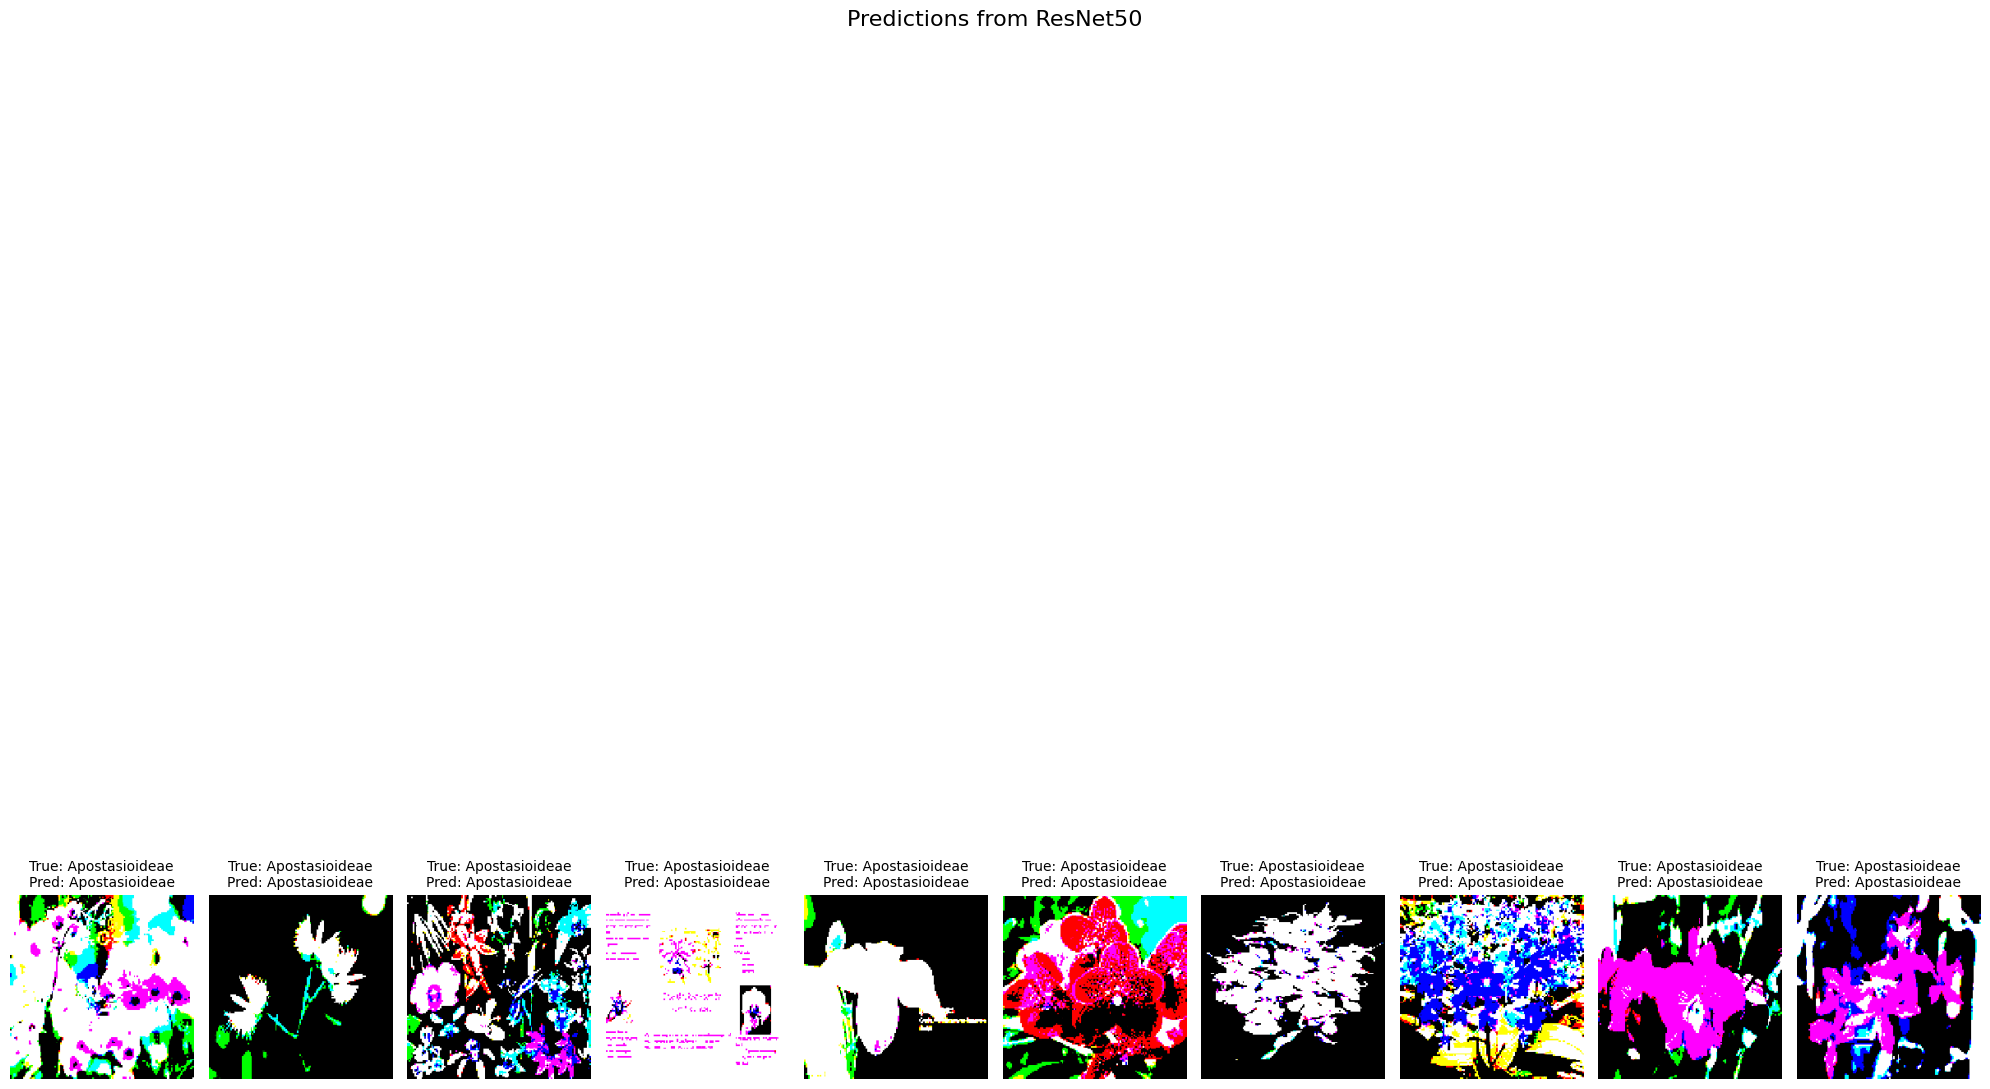

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images with predictions
def plotImagesWithPredictions(images_arr, true_labels, predicted_labels, model_name):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, true_label, pred_label, ax in zip(images_arr, true_labels, predicted_labels, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.suptitle(f"Predictions from {model_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Fetch a batch of test images and labels
test_imgs, test_labels = next(test_batches)

# Convert test_labels from one-hot encoding to class indices for readability
true_labels = np.argmax(test_labels, axis=1)
orchid_class = sorted(list(orchid_class))  # Guarantee class order
class_names = orchid_class  # Use this consistently
print("Class Names:", class_names)
# RESNET Predictions
y_pred = resnet_final_model.predict(test_imgs)
y_pred_resnets = np.argmax(y_pred, axis=1)
plotImagesWithPredictions(test_imgs, 
                          [class_names[i] for i in true_labels], 
                          [class_names[i] for i in y_pred_resnets], 
                          model_name="ResNet50")


1/1 [==============================] - 0s 333ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-113.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input dat

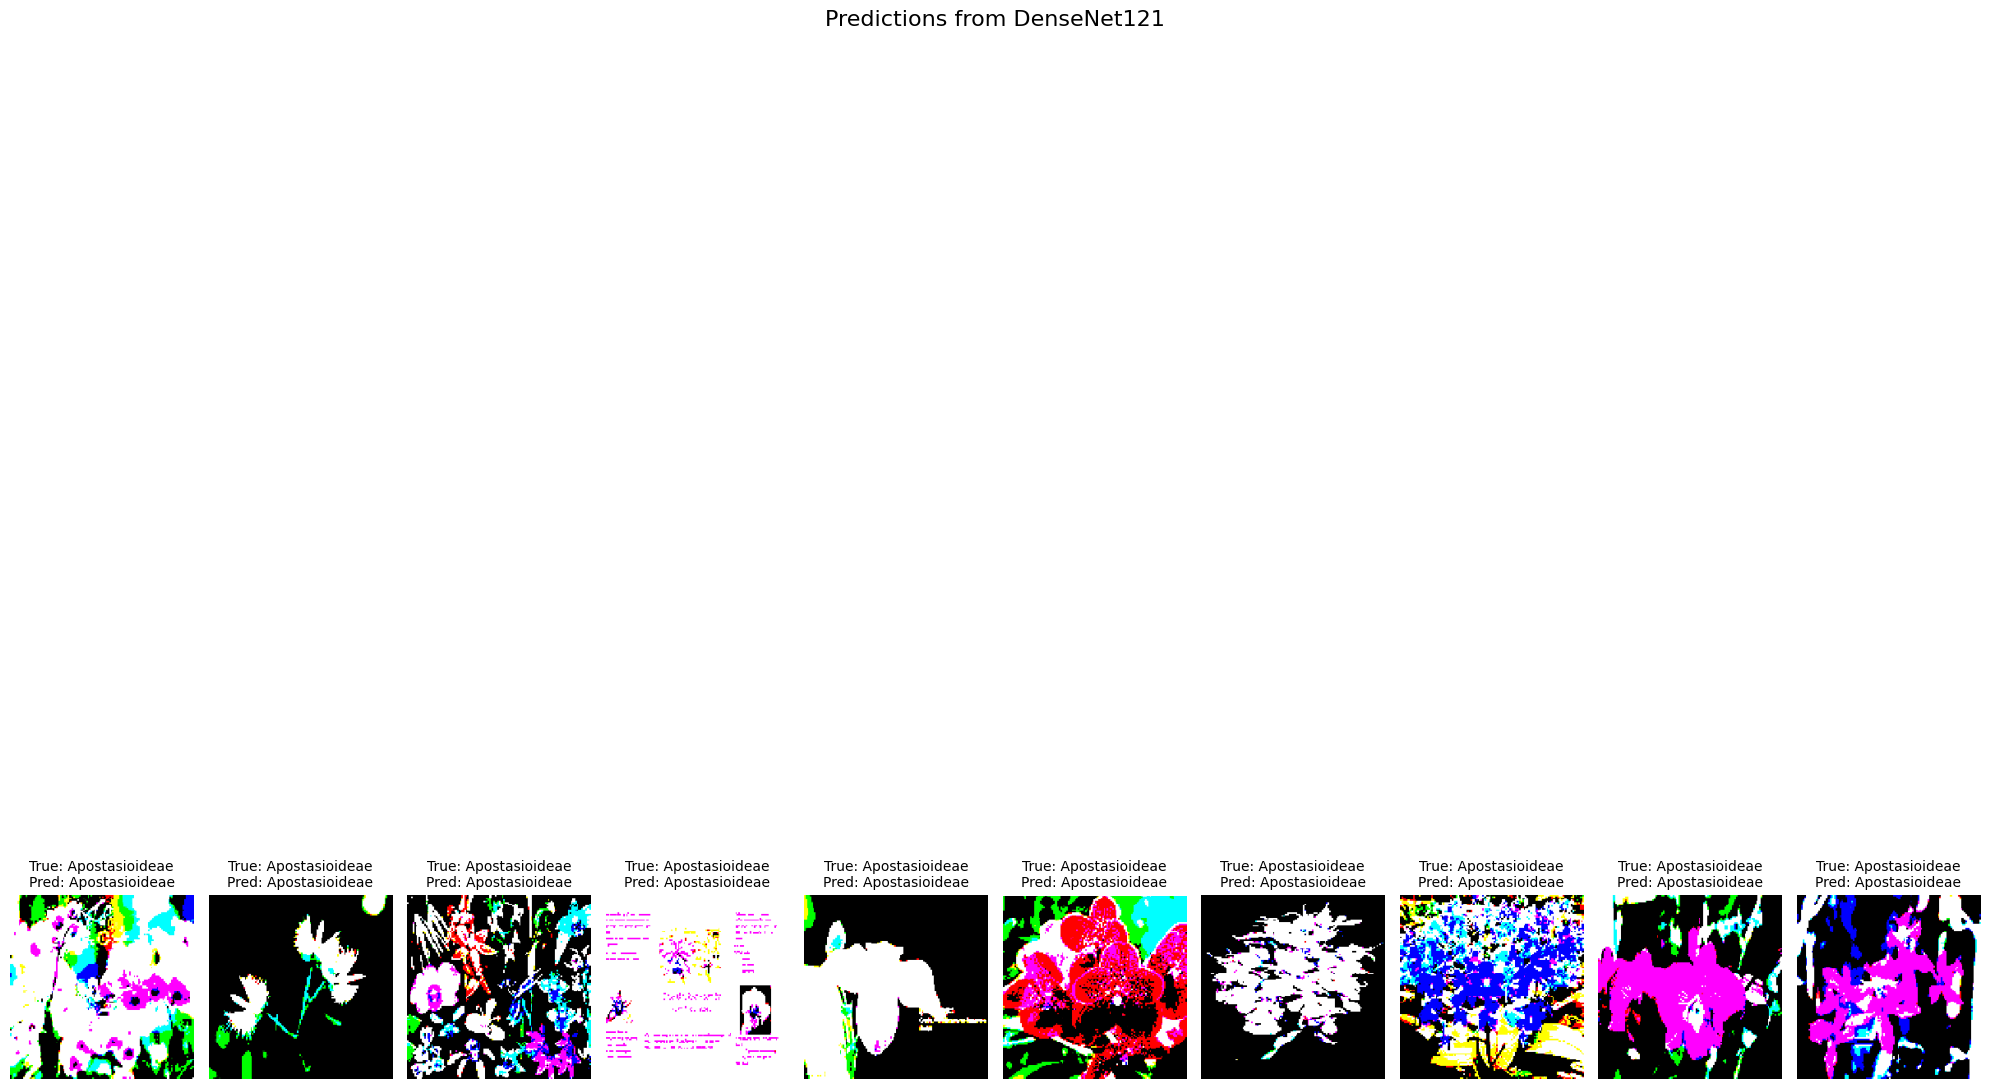

In [41]:
y_pred = densenet_final_model.predict(test_imgs)
y_pred_densenet_labels = np.argmax(y_pred, axis=1)
plotImagesWithPredictions(test_imgs, 
                          [class_names[i] for i in true_labels], 
                          [class_names[i] for i in y_pred_densenet_labels], 
                          model_name="DenseNet121")

1/1 [==============================] - 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-113.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.779..151.061].
Clipping input dat

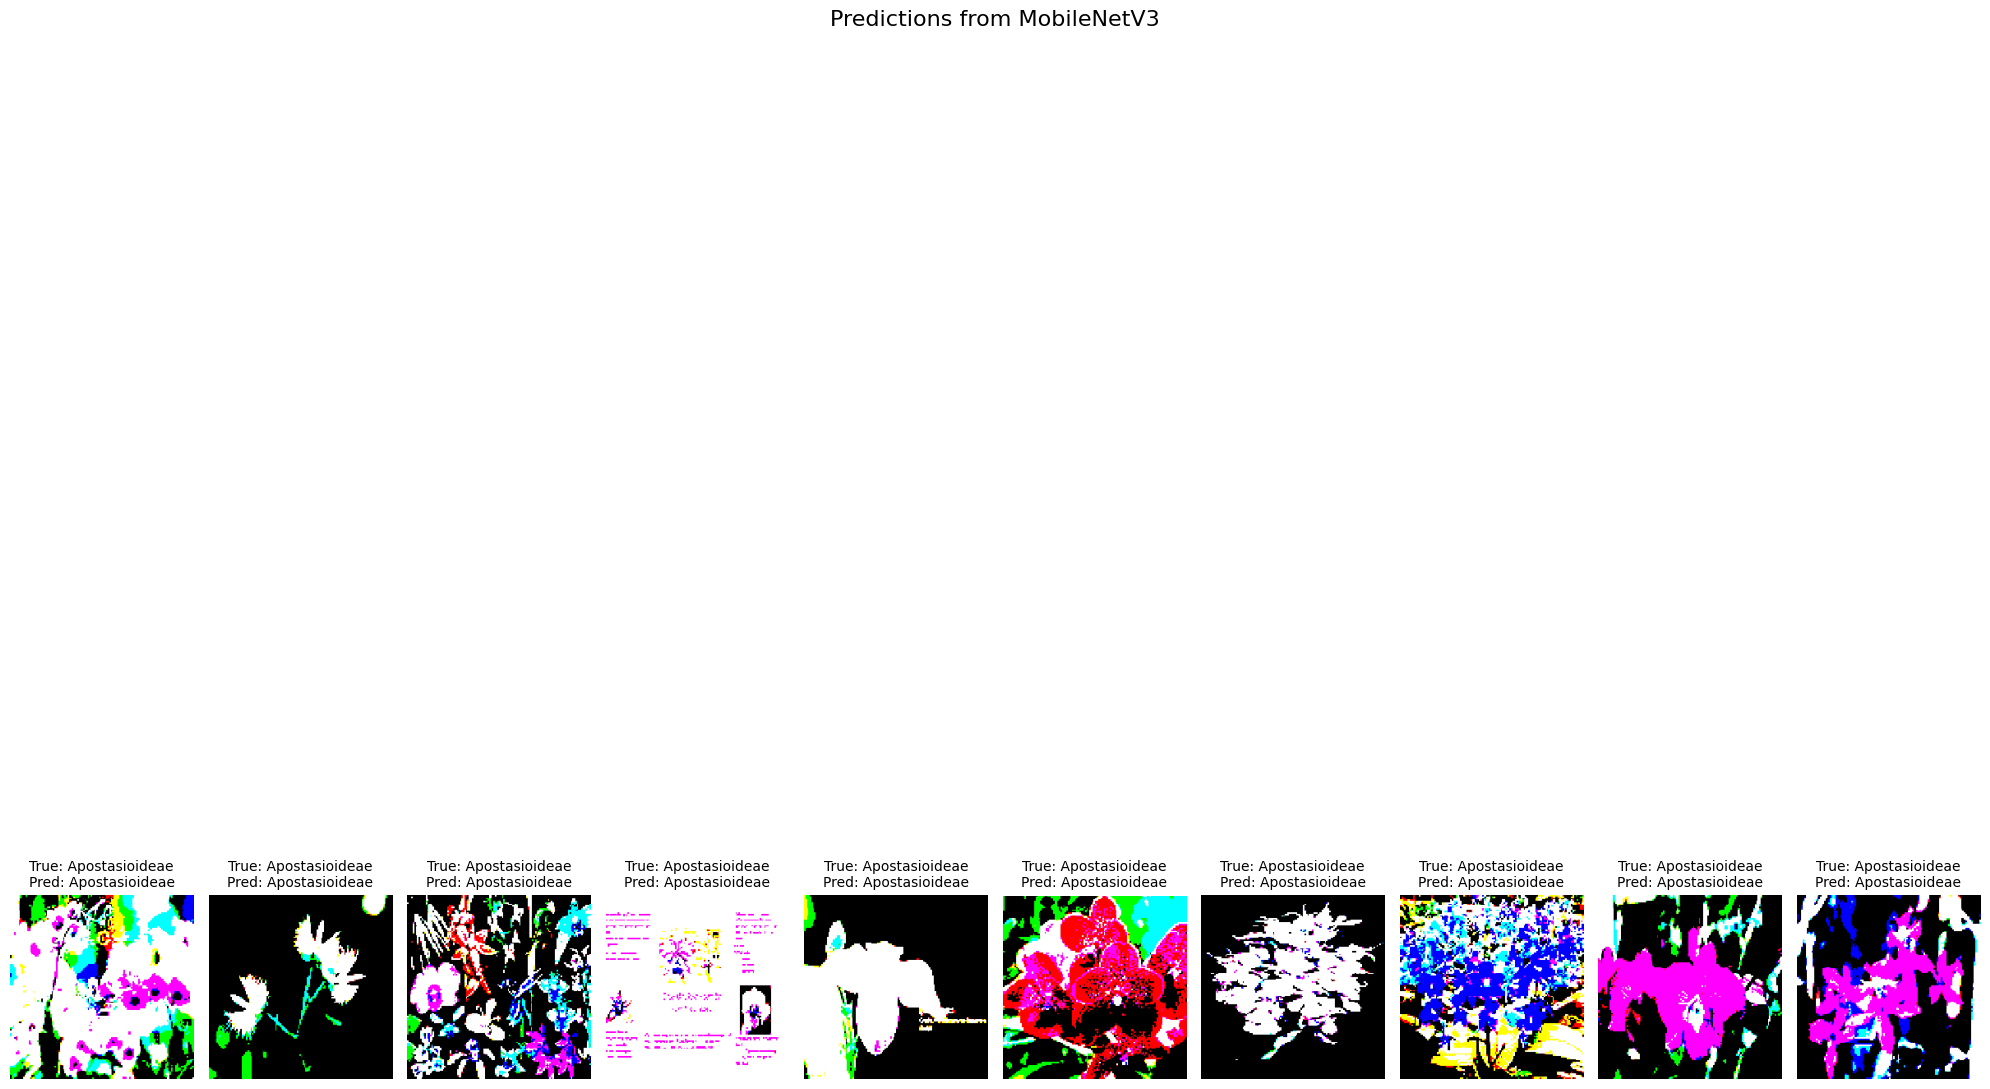

In [42]:
y_pred = mobilenet_final_model.predict(test_imgs)
y_pred_mobilenet_labels = np.argmax(y_pred, axis=1)
plotImagesWithPredictions(test_imgs, 
                          [class_names[i] for i in true_labels], 
                          [class_names[i] for i in y_pred_densenet_labels], 
                          model_name="MobileNetV3")

<h3> - Graphs for model loss and accuracy</h3>


In [33]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

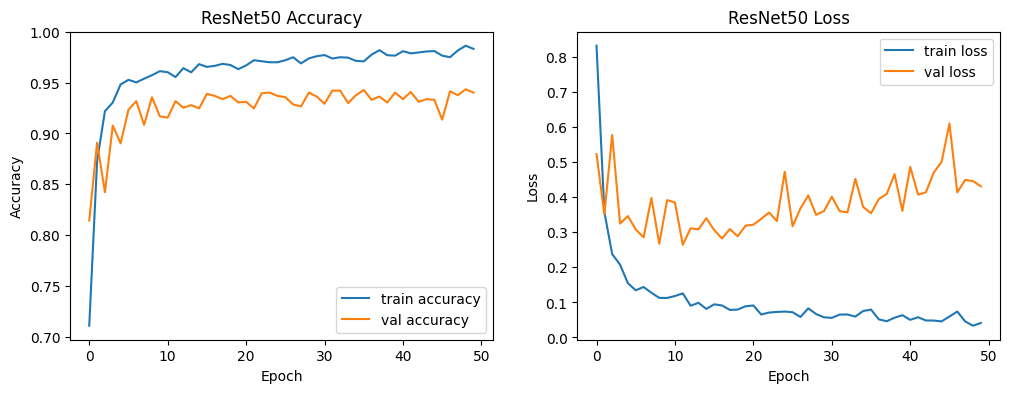

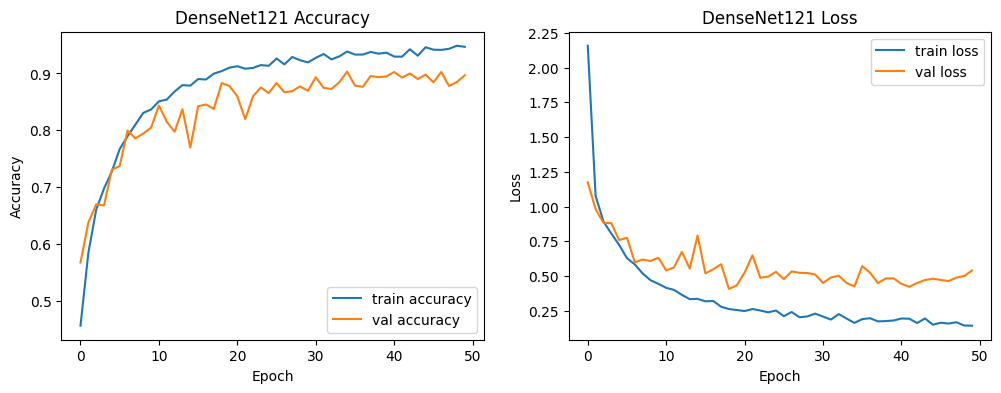

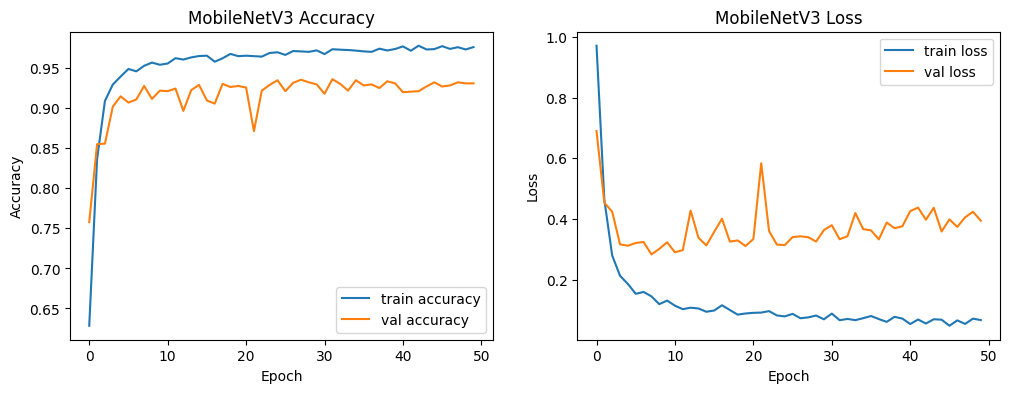

In [36]:
plot_history(resnet_history, "ResNet50")
plot_history(densenet_history, "DenseNet121")
plot_history(history_mobilenet, "MobileNetV3")

<h3> - Evaluation using confusion matrix</h3>

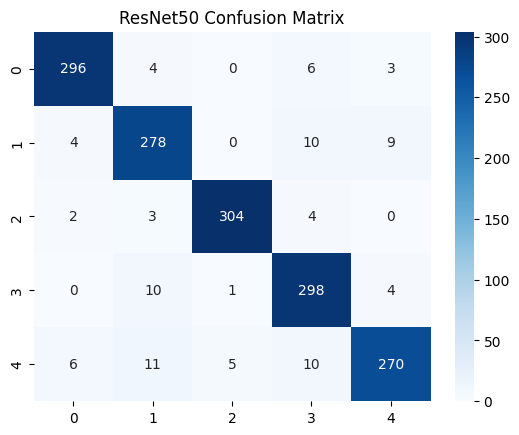

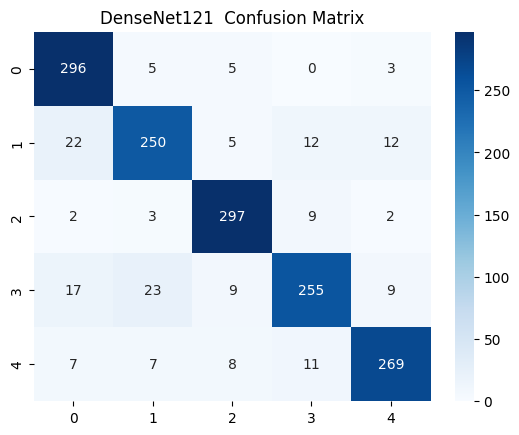

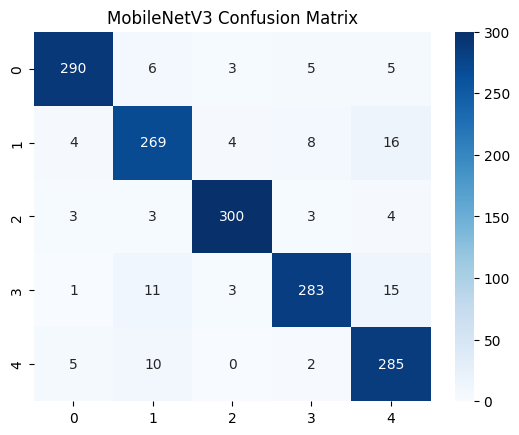

In [37]:
#ResNet50
conf_matrix_resnet = confusion_matrix(y_true, y_pred_resnet)
sns.heatmap(conf_matrix_resnet, annot=True, fmt='d', cmap='Blues')
plt.title("ResNet50 Confusion Matrix")
plt.show()

# DenseNet121
conf_matrix_densenet = confusion_matrix(y_true, y_pred_densenet)
sns.heatmap(conf_matrix_densenet, annot=True, fmt='d', cmap='Blues')
plt.title("DenseNet121  Confusion Matrix")
plt.show()


# MobileNetV3
conf_matrix_mobilenet = confusion_matrix(y_true, y_pred_mobilenet)
sns.heatmap(conf_matrix_mobilenet, annot=True, fmt='d', cmap='Blues')
plt.title("MobileNetV3 Confusion Matrix")
plt.show()


<h3> - Testing Datasets</h3>


In [38]:
import pandas as pd

# Use recorded training times
# Ensure these values are dynamically updated after training
training_time_resnet = resnet_history_dict.get("training_time", 0)  # Recorded during ResNet training
training_time_densenet = densenet_history_dict.get("training_time", 0)  # Recorded during DenseNet training
training_time_mobilenet = mobilenet_history_dict.get("training_time", 0)  # Recorded during MobileNet training

# Store metrics for comparison
models_comparison = {
    "Model": ["ResNet50", "DenseNet121", "MobileNetV3"],
    "Accuracy": [test_accuracy_resnet, test_accuracy_densenet, test_accuracy_mobilenet],
    "Test Loss": [test_loss_resnet, test_loss_densenet, test_loss_mobilenet],
    "mAP": [mAP, mAP_densenet, mAP_mobilenet],
    "Training Time (s)": [training_time_resnet, training_time_densenet, training_time_mobilenet],
    "Parameters": [
        resnet_final_model.count_params(),
        densenet_final_model.count_params(),
        mobilenet_final_model.count_params()
    ]
}

# Create a DataFrame
results_df = pd.DataFrame(models_comparison)

# Display the results DataFrame
print("Model Comparison Results:")
print(results_df)

# Identify the best model based on accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model Based on Accuracy:")
print(best_model)

# Identify the best model based on mAP
best_model_map = results_df.loc[results_df['mAP'].idxmax()]
print("\nBest Model Based on mAP:")
print(best_model_map)

# Optionally, identify the fastest training model
fastest_model = results_df.loc[results_df['Training Time (s)'].idxmin()]
print("\nFastest Training Model:")
print(fastest_model)


Model Comparison Results:
         Model  Accuracy  Test Loss       mAP  Training Time (s)  Parameters
0     ResNet50  0.940182   0.426297  0.978373       12639.752521    25691013
1  DenseNet121  0.888817   0.563574  0.946532       14266.192989     8092229
2  MobileNetV3  0.927828   0.352738  0.975663        1630.818161     1535093

Best Model Based on Accuracy:
Model                    ResNet50
Accuracy                 0.940182
Test Loss                0.426297
mAP                      0.978373
Training Time (s)    12639.752521
Parameters               25691013
Name: 0, dtype: object

Best Model Based on mAP:
Model                    ResNet50
Accuracy                 0.940182
Test Loss                0.426297
mAP                      0.978373
Training Time (s)    12639.752521
Parameters               25691013
Name: 0, dtype: object

Fastest Training Model:
Model                MobileNetV3
Accuracy                0.927828
Test Loss               0.352738
mAP                     0.97566

<h3> - Final Conclusion</h3>

<p style="font-size:medium;">Model comparison table shows that the best model is <b>ResNet50</b> based on the highest accuracy (0.940182) compared to other models and got the highest mean average pracesion (mAP) which is 0.978373. Eventhough it has a largest number of parameters (25691013) and long training times (12639.752521s), but this model is superior and outperforms both of these two models <b>DenseNet121</b> and <b>MobileNetV3</b> in terms of performances.</Db> So, this model is the best choice for the classification task where model performance is critical.<br>


<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">SECTION:REFERENCES</center><br><hr>


- https://medium.com/@nithishreddy0627/a-beginners-guide-to-image-scraping-with-python-and-selenium-38ec419be5ff
- https://deepnote.com/app/dennis-dfa8/Web-Scraping-Images-5e2baaa2-d24f-4d47-a124-687639818a7f